In [1]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


# Importing libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Loading & Exploring the Data

Lets start by loading the data

In [3]:
stud_perf=pd.read_csv('C:/Users/Asus/Downloads/StudentsPerformance.csv')
stud_perf.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
stud_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
stud_perf.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Data Visualization &  Feature Extraction 

Lets crete new column representing total marks which is nothing but sum of math, reading and writing scores

In [10]:
stud_perf['Total marks']=stud_perf['math score']+stud_perf['reading score']+stud_perf['writing score']

In [11]:
stud_perf.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'Total marks'],
      dtype='object')

**Countplot**

Lets create countplot showcasing counts of attributes of each entity in the dataset

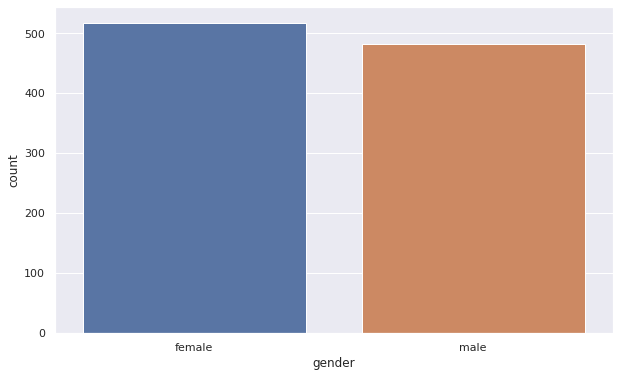

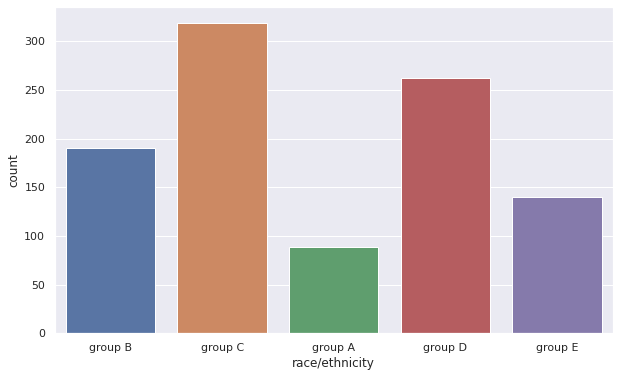

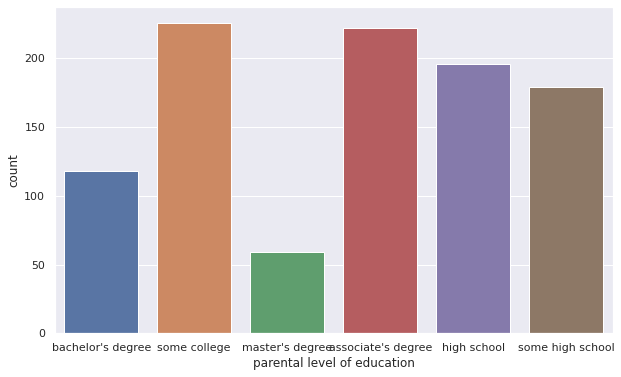

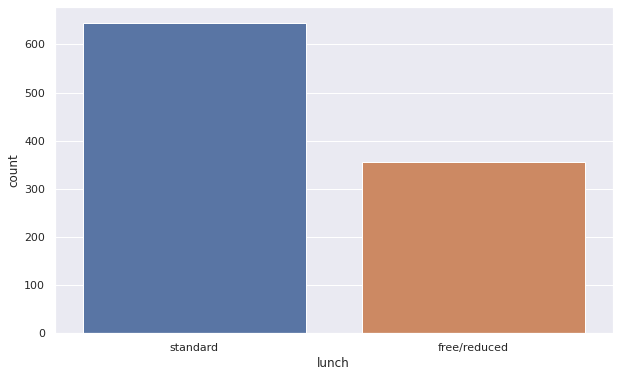

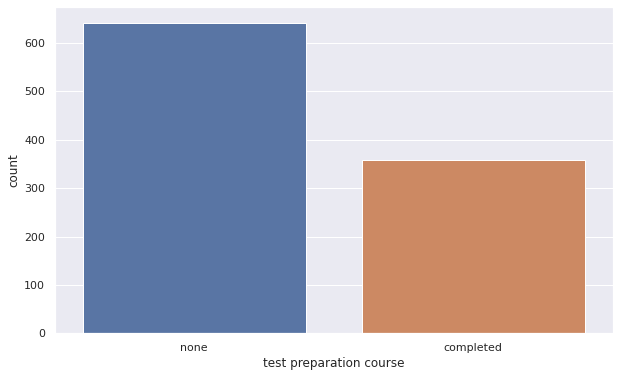

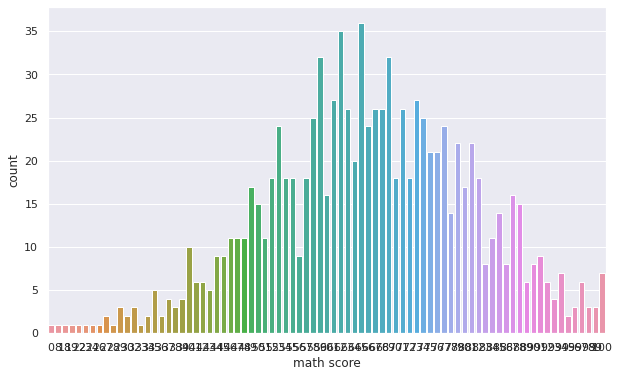

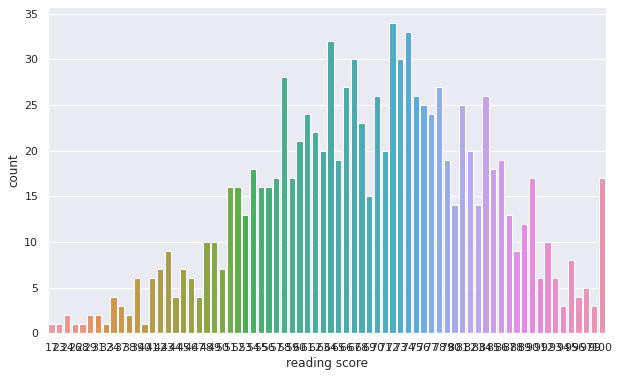

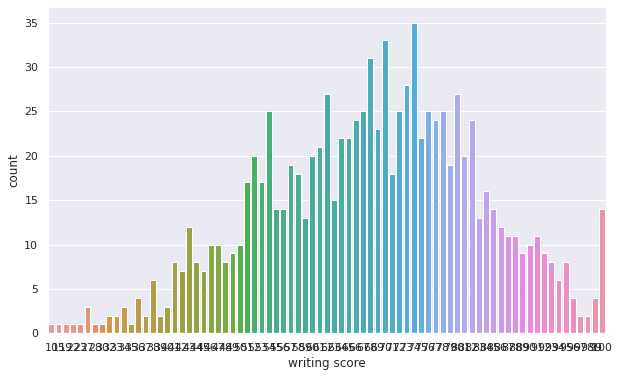

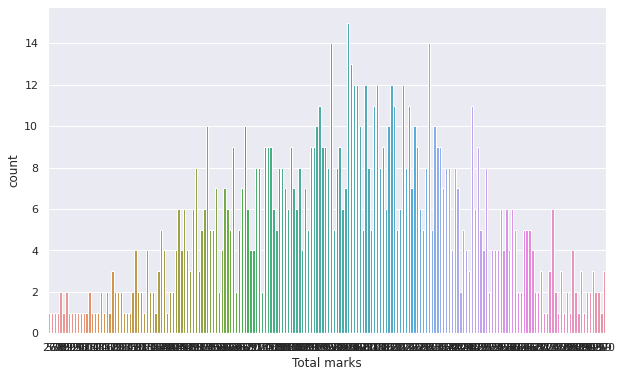

In [44]:
for item in stud_perf.columns:
    plt.figure(figsize=(10,6))
    sns.countplot(x=stud_perf[item])
    plt.show()

**Pairplot**

Plot the pairplot which shows correlation between numerical types columns in the dataset 

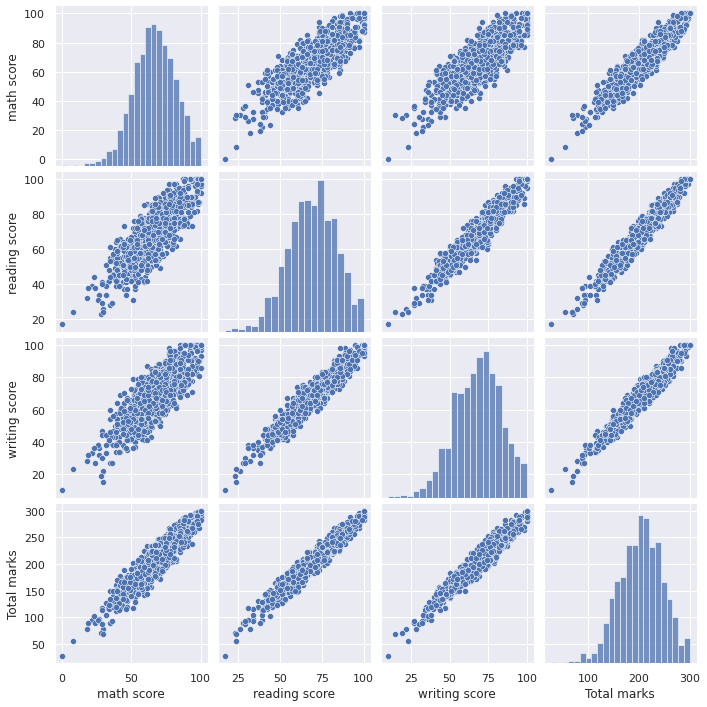

In [53]:
sns.pairplot(stud_perf)

**Histogram**

Ploting histogram for each of the numerical columns depicting their distribution

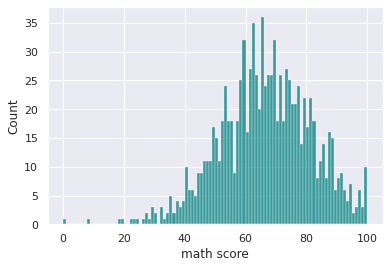

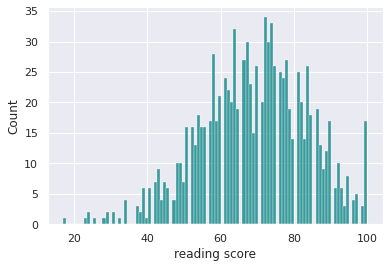

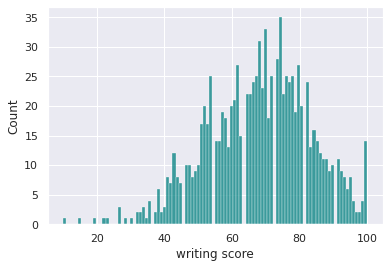

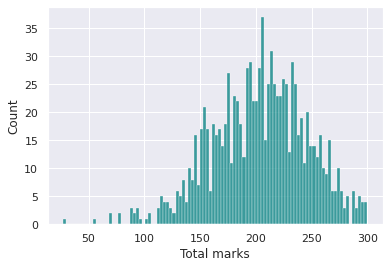

In [54]:
stud_marks=stud_perf.drop(['gender', 'race/ethnicity', 'parental level of education', 'lunch','test preparation course'],axis=1)
sns.set_style('darkgrid')
for item in stud_marks.columns:
    sns.histplot(stud_perf[item], bins=100, color='teal')
    plt.show()

In [42]:
stud_perf.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total marks
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


Histogram plots for total marks distribution as per other variables

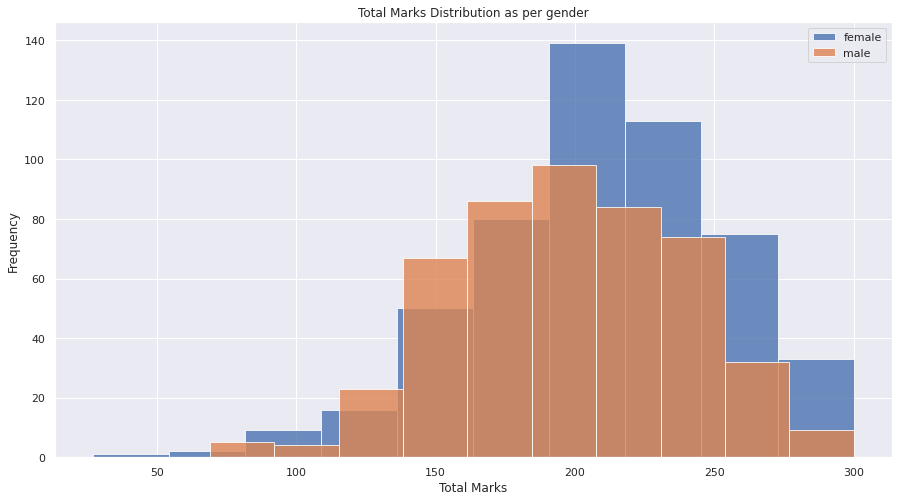

---------------------------------------------------------------------------------------------------------------------------


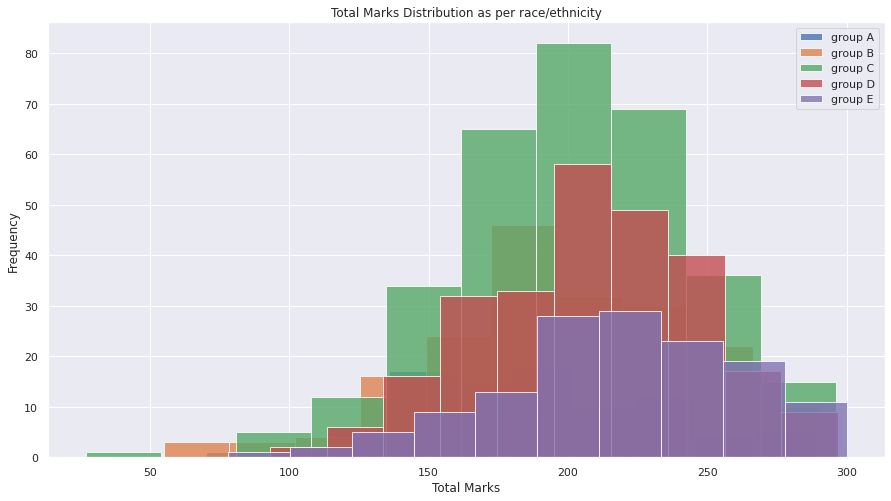

---------------------------------------------------------------------------------------------------------------------------


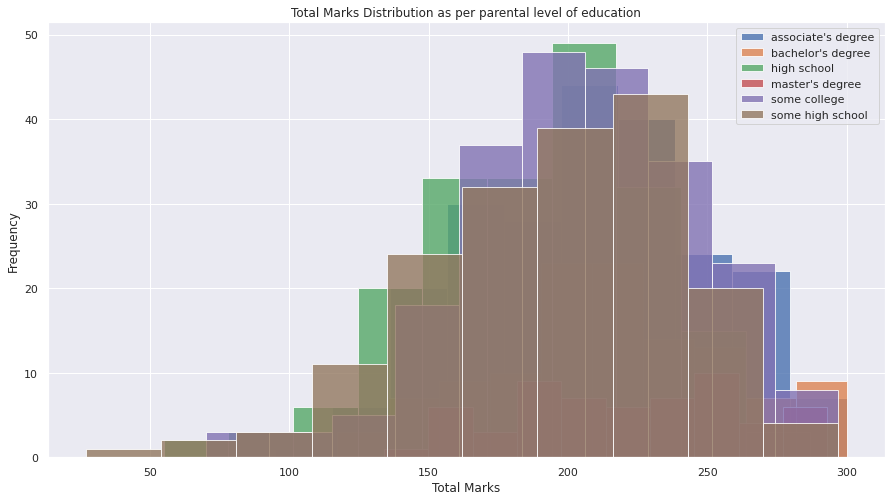

---------------------------------------------------------------------------------------------------------------------------


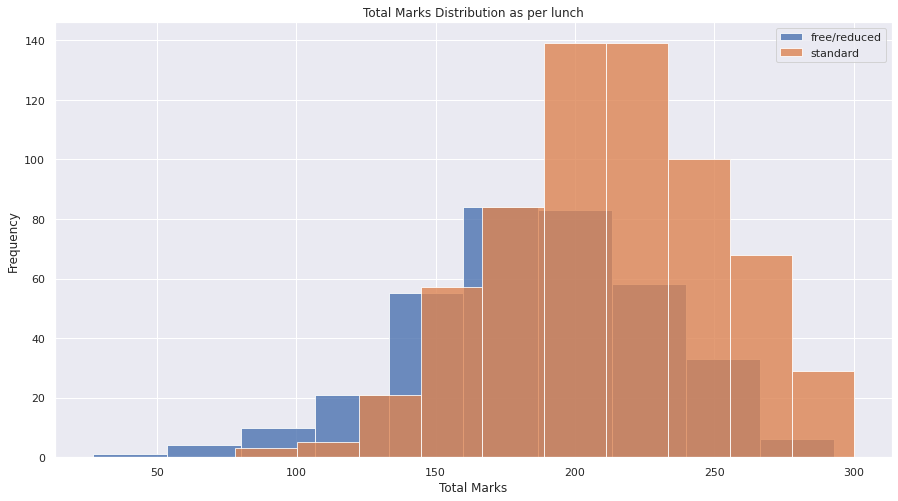

---------------------------------------------------------------------------------------------------------------------------


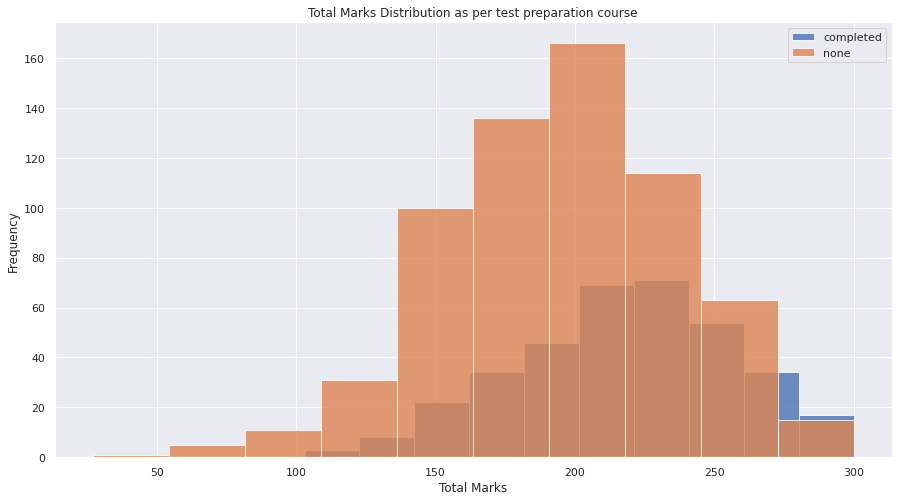

---------------------------------------------------------------------------------------------------------------------------


In [64]:
for x in stud_perf.columns[:5]:
    plt.figure(figsize=(15,8))
    stud_perf.groupby(x)['Total marks'].plot.hist(alpha=0.8)
    plt.xlabel("Total Marks")
    plt.title("Total Marks Distribution as per {one}".format(one=x))
    plt.legend()
    plt.show()
    print("---------------------------------------------------------------------------------------------------------------------------")
    

**Barplot**

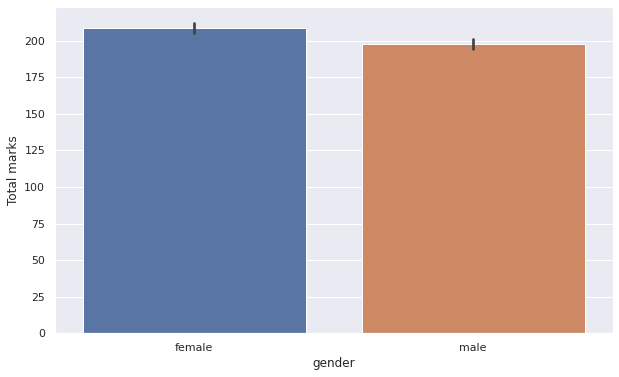

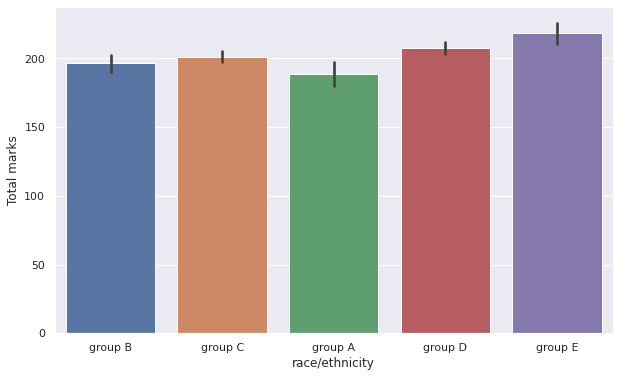

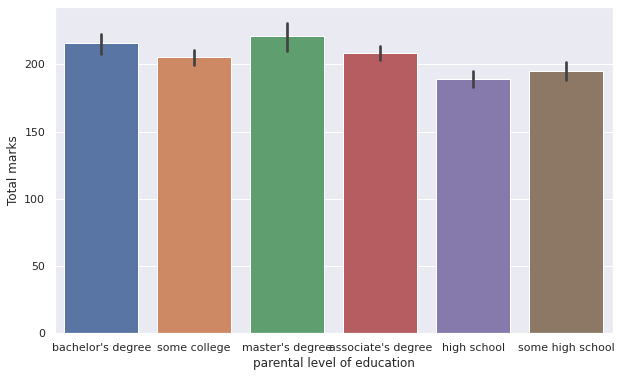

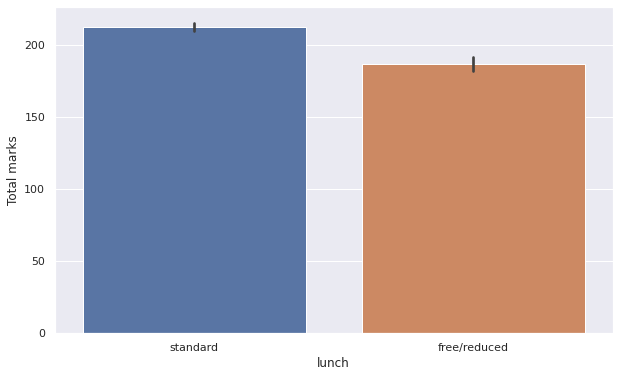

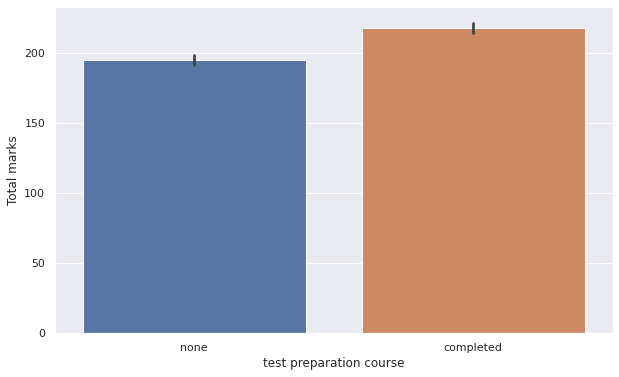

In [69]:
for x in stud_perf.columns[:5]:
    plt.figure(figsize=(10,6))
    sns.barplot(x=x,y='Total marks',data=stud_perf)
    plt.show()
    print('\n')

**Violinplot and swarmplot**



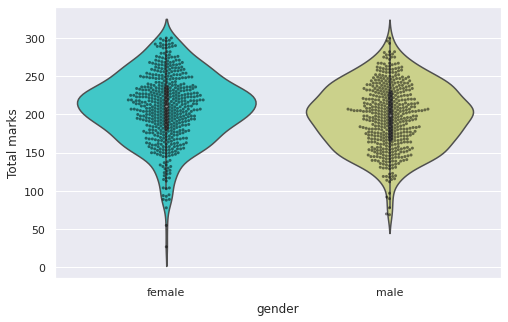

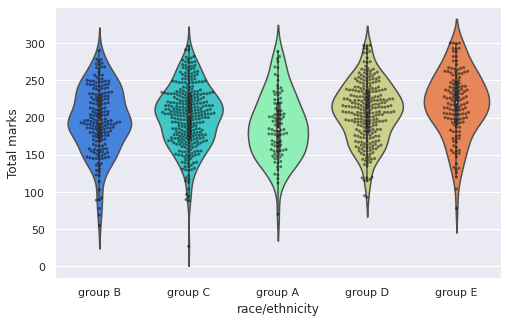

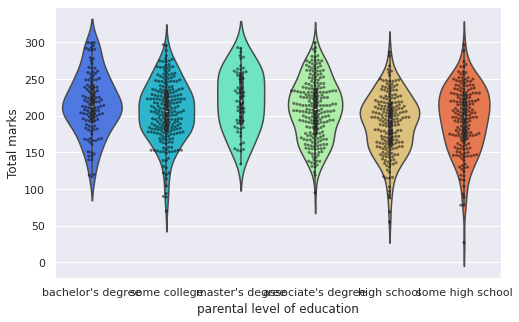

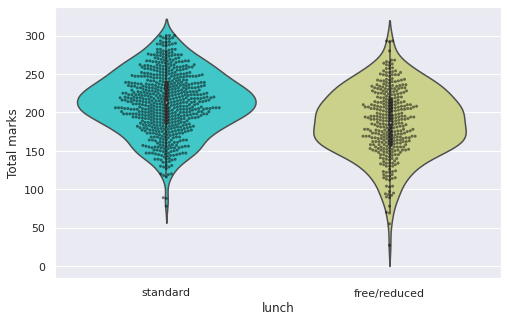

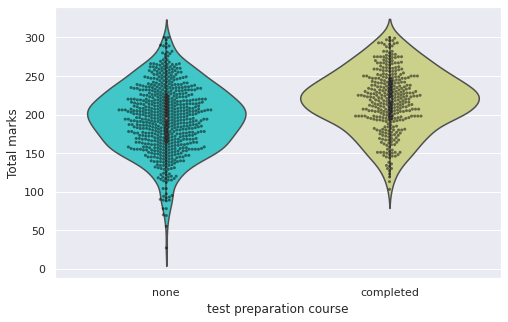

In [70]:
for x in stud_perf.columns[:5]:
    plt.figure(figsize=(8,5))
    sns.violinplot(x=x, y="Total marks", data=stud_perf,palette='rainbow')
    sns.swarmplot(x=x, y="Total marks", data=stud_perf,color='black',alpha=0.5,size=3)
    plt.show()
    print('\n')

In [71]:
stud_perf.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total marks
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


**Converting Categorical Features**

To predict the total marks of any student in the table we need to take into consideration all the columns.

So lets convert the categorical data columns into numerical ones by using get_dummies function

In [72]:
stud_perf1=pd.get_dummies(stud_perf[stud_perf.columns[:5]], drop_first=True)
stud_perf1.head()

,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,0,1,0,0,0,1,0,0,0,0,1,1
1,0,0,1,0,0,0,0,0,1,0,1,0
2,0,1,0,0,0,0,0,1,0,0,1,1
3,1,0,0,0,0,0,0,0,0,0,0,1
4,1,0,1,0,0,0,0,0,1,0,1,1


Creating final dataframe so as to train the model

In [73]:
stud_perf.drop(['gender', 'race/ethnicity', 'parental level of education', 'lunch','test preparation course'], axis=1, inplace=True)
stud_perf=pd.concat([stud_perf1, stud_perf], axis=1)
stud_perf.head()

,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none,math score,reading score,writing score,Total marks
0,0,1,0,0,0,1,0,0,0,0,1,1,72,72,74,218
1,0,0,1,0,0,0,0,0,1,0,1,0,69,90,88,247
2,0,1,0,0,0,0,0,1,0,0,1,1,90,95,93,278
3,1,0,0,0,0,0,0,0,0,0,0,1,47,57,44,148
4,1,0,1,0,0,0,0,0,1,0,1,1,76,78,75,229


# Building a Linear Regression model 

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

 **Train Test Split**

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(stud_perf.drop(['Total marks'], axis=1), stud_perf['Total marks'], test_size=0.3, random_state=101)

**Training and Predicting**

In [76]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)
predictions = LR.predict(X_test)

Lets visualize our prediction against the testing data

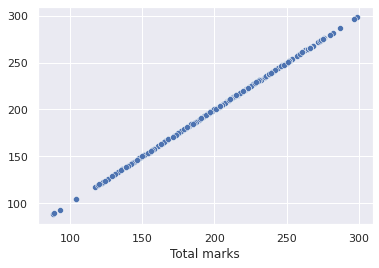

In [77]:
sns.scatterplot(x=y_test, y=predictions);

Well as above plot shows our model fits very well and showing that the reg score is almost equal to 1,
but still we can evaluate the model by the help of the cost functions

**Evaluation**

In case of linear regression we mostly use mean absolute error, mean squared error & root mean squared error as a cost fuctions 

So lets import them and evaluate our model

In [78]:
from sklearn import metrics 

In [79]:
print('The Mean absolute error:', metrics.mean_absolute_error(y_test, predictions))
print('The mean squared error:', metrics.mean_squared_error(y_test, predictions))
print('The root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

The Mean absolute error: 1.2600291180812444e-14
The mean squared error: 5.2371949590352825e-28
The root mean squared error: 2.2884918525166923e-14


Pretty well! That shows our model is best fitted on the given dataset

# Summery

We got some insights from the data visualization that are as follow:
* The total marks is more correlated with the reading & writing score of the student than maths score
* If we see genderwise total marks obtain, then generally highest marks count is greater for girls than boys inspite of very small difference in genderwise count.
* As per luch taken, the data says that the number of students with higher marks (lets say for top 10 percentile), there is higher probability that they consume the standard lunch 

As our model is best fitted we can conclude that:
* The total marks of any student is somehow influence by each and every parameters given in the dataset.

    